In [16]:
import pandas as pd
import matplotlib.pyplot as plt

ifsp_df = pd.read_excel("C:\\Users\\jtbes\\Documents\\DA8\Projects\\teis_da8_1-granny_pandas\\TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx", sheet_name='Compiled_IFSP Teaming')

kids_df = pd.read_excel("C:\\Users\\jtbes\\Documents\\DA8\Projects\\teis_da8_1-granny_pandas\\TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx", sheet_name='All Children with IFSPs')

In [2]:
covisits = ifsp_df[ifsp_df['IFSP Teaming ID name'] == 'Co-Visit']

In [4]:
covisits = covisits.sort_values(['CHILD_ID', 'SERVICE_DATE'])

In [12]:
covisits = covisits.reset_index(drop=True)

In [13]:
visit_id = 1
visit_ids = []

for index, row in covisits.iterrows():
    if index == 0:
        visit_ids.append(visit_id)
    elif row['CHILD_ID'] == covisits.iloc[index - 1]['CHILD_ID'] and row['SERVICE_DATE'] == covisits.iloc[index - 1]['SERVICE_DATE']:
        visit_ids.append(visit_id)
    else:
        visit_id += 1
        visit_ids.append(visit_id)

covisits['VISIT_ID'] = visit_ids

In [67]:
# cleaning strings



pattern_mapping = {
    'Dev': 'Developmental Therapy',
    'Phys': 'Physical Therapy',
    'Occu': 'Occupational Therapy',
    'Speech': 'Speech Therapy'
    'eval_dev': 'Evaluation - Developmental Therapy',
    'eval_vision': 'Evaluation - Vision Services'
}


def clean_service_name(service_name):
    cleaned_name = service_name  
    
    
    for pattern, cleaned_value in pattern_mapping.items():
        if pattern in service_name:
            cleaned_name = cleaned_value
            break
    
    return cleaned_name


covisits['cleaned_service_name'] = covisits['Service Name'].apply(clean_service_name)
covisits

SyntaxError: invalid syntax (2155997998.py, line 10)

In [24]:
visit_counts = covisits['VISIT_ID'].value_counts().reset_index()
visit_counts.columns = ['visit_id', 'counts']
visit_counts.head(50)

,visit_id,counts
0,1049,3
1,726,3
2,287,3
3,682,3
4,649,3
5,2409,3
6,2219,3
7,291,3
8,1051,3
9,2410,3


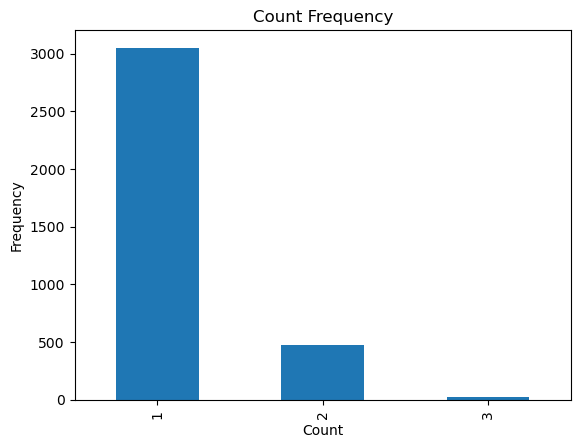

In [21]:
count_frequencies = visit_counts['counts'].value_counts().reset_index()
count_frequencies.columns = ['count', 'frequency']


count_frequencies.plot.bar(x='count', y='frequency', legend=False)


plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Count Frequency')

plt.show()

In [26]:
providers = ifsp_df.groupby('Agency Name').size().reset_index(name = 'service_count')
co_providers = covisits.groupby('Agency Name').size().reset_index(name = 'covisit_count')
merged_df = pd.merge(providers, co_providers, on='Agency Name', how='inner')

merged_df['pct_covisit'] = merged_df['covisit_count']/merged_df['service_count']
merged_df.sort_values(by=['covisit_count', 'pct_covisit'], inplace=True, ascending = False)

merged_df.head(50)

,Agency Name,service_count,covisit_count,pct_covisit
35,LeBonheur EI & Dev (LEAD) (vendor),924,902,0.976190
34,LeBonheur EI & Dev (LEAD) (EIRA),505,340,0.673267
56,Shelby Residential & Voc Svcs(SRVS) (EIRA),323,232,0.718266
67,"Therapy & Learning Center, Inc. (EIRA)",479,216,0.450939
29,"Kid's Putnam, Inc.",445,212,0.476404
47,"Physical Therapy Services, PA (EIRA)",589,181,0.307301
73,"WAVES, Inc.",429,169,0.393939
58,Siskin Children's Institute (EIRA),685,149,0.217518
14,Emory Valley Center,730,138,0.189041
16,Expanding Horizons - ETSU,192,130,0.677083


In [28]:
agency_type = covisits.groupby('Agency Type').size().reset_index(name = 'covisit_count')
agency_type

,Agency Type,covisit_count
0,EIRA,2677
1,Independent,1414


In [62]:
service_type = covisits.groupby('cleaned_service_name').size().reset_index(name = 'covisit_count')
service_type

,cleaned_service_name,covisit_count
0,Assistive Technology,3
1,Developmental Therapy,2703
2,Evaluation - Occupational Therapy,26
3,Evaluation - Speech Therapy,15
4,Evaluation/Assessment - Vision,1
5,Occupational Therapy,502
6,Occupational Therapy Assistant,1
7,Physical Therapy,354
8,Speech Therapy,425
9,Speech Therapy-Group,1


In [63]:
from itertools import combinations
pd.set_option('display.max_colwidth', None)

visit_grouped = covisits.groupby('VISIT_ID')['cleaned_service_name'].apply(list).reset_index()


visit_grouped['service_pairs'] = visit_grouped['cleaned_service_name'].apply(lambda x: list(combinations(x, 2)))


service_pairs = [pair for pairs in visit_grouped['service_pairs'] for pair in pairs]
service_pairs_sorted = [tuple(sorted(pair)) for pair in service_pairs]

pair_counts = pd.Series(service_pairs_sorted).value_counts().reset_index()
pair_counts.columns = ['service_pair', 'count']


pair_counts = pair_counts.sort_values('count', ascending=False)
pair_counts

,service_pair,count
0,"(Developmental Therapy, Physical Therapy)",114
1,"(Developmental Therapy, Speech Therapy)",101
2,"(Developmental Therapy, Occupational Therapy)",93
3,"(Occupational Therapy, Physical Therapy)",89
4,"(Occupational Therapy, Speech Therapy)",53
5,"(Developmental Therapy, Developmental Therapy)",43
6,"(Physical Therapy, Speech Therapy)",25
7,"(Developmental Therapy, Vision Services)",19
8,"(Evaluation - Occupational Therapy, Physical Therapy)",6
9,"(Developmental Therapy, Evaluation - Occupational Therapy)",5


In [50]:
agency_grouped = covisits.groupby('VISIT_ID')['Agency Name'].apply(list).reset_index()


agency_grouped['agency_pairs'] = agency_grouped['Agency Name'].apply(lambda x: list(combinations(x, 2)))


agency_pairs = [pair for pairs in agency_grouped['agency_pairs'] for pair in pairs]
agency_pairs_sorted = [tuple(sorted(pair)) for pair in agency_pairs]

apair_counts = pd.Series(agency_pairs_sorted).value_counts().reset_index()
apair_counts.columns = ['agency_pair', 'count']


apair_counts = apair_counts.sort_values('count', ascending=False)
apair_counts

,agency_pair,count
0,"(LeBonheur EI & Dev (LEAD) (vendor), LeBonheur EI & Dev (LEAD) (vendor))",176
1,"(LeBonheur EI & Dev (LEAD) (EIRA), LeBonheur EI & Dev (LEAD) (vendor))",170
2,"(Therapeutic Rehab Services - Cathy Otis, Therapeutic Rehab Services - Cathy Otis)",24
3,"(Therapy & Learning Center Inc (vendor WTCCD), Therapy & Learning Center, Inc. (EIRA))",18
4,"(Erlanger Health Care System/TC Thompson's Children, Erlanger Health Care System/TC Thompson's Children)",16
5,"(Shelby Residential & Voc Svcs(SRVS) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",10
6,"(KF Pediatric Therapy, Siskin Children's Institute (EIRA))",9
7,"(KF Pediatric Therapy, Signal Centers, Inc.)",9
8,"(WAVES, Inc., WAVES, Inc.)",8
9,"(LeBonheur EI & Dev (LEAD) (EIRA), Shelby Residential & Voc Svcs(SRVS) (EIRA))",8


In [53]:
user_count = covisits.groupby('ADD_USER').size().reset_index(name = 'covisit_count')
user_count = user_count.sort_values(by = 'covisit_count', ascending = False)
user_count

,ADD_USER,covisit_count
319,REDDMISSY,199
332,ROGERSKALEY,174
313,PULLIAMAMY,129
286,OLIVERCIARA,123
360,SOSEBEEJULIE1,107
...,...,...
213,LADERACARMEN,1
216,LANKFORDAMBER1,1
220,LASTERDENISE,1
221,LAURENCEELIZABETH,1


In [68]:
print(covisits['cleaned_service_name'].unique()) ## cleaning didn't quite work. revisit Tues

['Developmental Therapy' 'Speech Therapy' 'Occupational Therapy'
 'Physical Therapy' 'Speech Therapy-Group'
 'Evaluation - Occupational Therapy' 'Vision Services'
 'Evaluation - Speech Therapy' 'Assistive Technology'
 'Evaluation/Assessment - Vision' 'Occupational Therapy Assistant']
